# Natural language processing

## Task 1

Загрузи датасет. Отрисуй Bar-plot с количеством комментариев для каждой категории токсичности 
и комментариев без токсичности.
![sample](../misc/images/bar-plot.png)
Выведи эти количества для каждой категории. 

In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df_toxic = pd.read_csv('../datasets/toxic.csv')
df_toxic.columns, df_toxic.shape

(Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
        'insult', 'identity_hate'],
       dtype='object'),
 (159571, 8))

In [3]:
df_toxic.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
df_toxic.shape

(159571, 8)

In [5]:
df_toxic['not toxic'] = (df_toxic[['toxic', 'severe_toxic', 'obscene', 'threat',
                                   'insult', 'identity_hate']].any(axis=1) + 1) % 2
data_plot = df_toxic.drop(['comment_text', 'id'], axis=1).\
    sum().sort_values(ascending=False)
data_plot  # Общее количество оценок по комментариям

not toxic        143346
toxic             15294
obscene            8449
insult             7877
severe_toxic       1595
identity_hate      1405
threat              478
dtype: int64

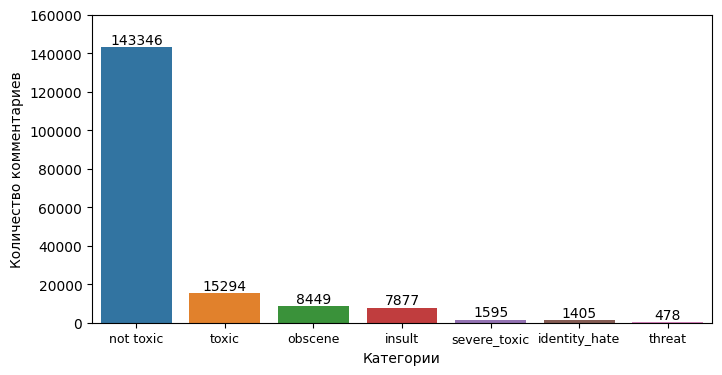

In [6]:
ax = sns.barplot(x=data_plot.index, y=data_plot.values)
ax.figure.set_size_inches(8, 4)
ax.set(xlabel='Категории', ylabel='Количество комментариев')
ax.bar_label(ax.containers[0])
ax.set_ylim(0, 160000)
ax.tick_params(axis='x', labelsize=9)

## Task 2

Используя библиотеку [nltk](https://www.nltk.org/) обработайте тексты комментариев: 
* Приведи текст к нижнему регистру и токенизируй
* Оставь токены содержащие английского алфавита 
* Убери знаки препинания, цифры
* Убери стоп-слова из библиотки nltk

Выведи количество токенов для комментария с индексом `000103f0d9cfb60f`

In [7]:
#!pip install nltk

In [8]:
import nltk
from nltk.corpus import stopwords, words
import re
from nltk.tokenize import word_tokenize
from tqdm.notebook import tqdm

In [9]:
nltk.download('stopwords', download_dir='./nltk/')
nltk.download('words', download_dir='./nltk/')
nltk.data.path.append('./nltk')

[nltk_data] Downloading package stopwords to ./nltk/...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to ./nltk/...
[nltk_data]   Package words is already up-to-date!


In [10]:
def normalize_tokens(text_list):
    stop_words = stopwords.words('english')
    normalized_text_list = []
    with tqdm(total=len(text_list)) as pbar:
        for text in text_list:
            clean_text = [word for word in word_tokenize(text.lower(), language="english")
                          if word in re.findall('[a-z]+', word)]
            clean_text = [
                word for word in clean_text if word not in stop_words]
            normalized_text_list.append(clean_text)
            pbar.update(1)
    return normalized_text_list


df_toxic['tokens_list'] = normalize_tokens(df_toxic.comment_text)

  0%|          | 0/159571 [00:00<?, ?it/s]

In [11]:
print('Количестов токенов:', len(
    *(df_toxic.tokens_list[df_toxic.id == '000103f0d9cfb60f'])))
print(*df_toxic.comment_text[df_toxic.id == '000103f0d9cfb60f'])
print(*df_toxic.tokens_list[df_toxic.id == '000103f0d9cfb60f'])

Количестов токенов: 9
D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)
['matches', 'background', 'colour', 'seemingly', 'stuck', 'thanks', 'talk', 'january', 'utc']


## Task 3

Раздели выборку на тренировачную и тестовоую с параметрами `random_state=21, test_size=0.3, shuffle=True`
Преобразуй тексты комментариев с помощью [TF-IDF](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) с количеством признаков равный 3000. \
Выведи размерность тренировачной выборки после преобразования текста.

In [12]:
df_toxic[['toxic', 'severe_toxic', 'obscene', 'threat',
                                   'insult', 'identity_hate', 'not toxic']].head()

,toxic,severe_toxic,obscene,threat,insult,identity_hate,not toxic
0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,1
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

df_toxic['tokens_text'] = [' '.join(x) for x in df_toxic['tokens_list']]
X_train, X_test, y_train, y_test = train_test_split(df_toxic['tokens_text'],
                                                    df_toxic[['toxic', 'severe_toxic', 'obscene', 'threat',
                                                              'insult', 'identity_hate', 'not toxic']],
                                                    test_size=0.3, random_state=21, shuffle=True)
vec = TfidfVectorizer(max_features=3000)
X_train_matrix = vec.fit_transform(X_train)
X_test_matrix = vec.transform(X_test)
# X_train_matrix.shape, X_test_matrix.shape
print('Размерность тренировочной выборки после преобразования:', X_train_matrix.shape)

Размерность тренировочной выборки после преобразования: (111699, 3000)


In [14]:
vec.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 3000,
 'min_df': 1,
 'ngram_range': (1, 1),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [15]:
vec.get_feature_names_out(), len(vec.get_feature_names_out())

(array(['ability', 'able', 'absolute', ..., 'yourselfgo', 'youtube',
        'zero'], dtype=object),
 3000)

In [16]:
y_test

,toxic,severe_toxic,obscene,threat,insult,identity_hate,not toxic
45925,0,0,0,0,0,0,1
1242,0,0,0,0,0,0,1
105698,0,0,0,0,0,0,1
125591,0,0,0,0,0,0,1
13235,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
135478,0,0,0,0,0,0,1
65274,0,0,0,0,0,0,1
3062,0,0,0,0,0,0,1
155974,0,0,0,0,0,0,1


In [17]:
X_train_matrix

<111699x3000 sparse matrix of type '<class 'numpy.float64'>'
	with 2220752 stored elements in Compressed Sparse Row format>

## Task 4

Реши задачу [Multi-Label](https://scikit-learn.org/stable/modules/multiclass.html) классификации используя [RidgeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier).
Посчитай значение ROC-AUC для тестовой выборки.

In [18]:
from sklearn.linear_model import RidgeClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

model = ClassifierChain(RidgeClassifier(
    fit_intercept=False), cv=5, random_state=21)
model = model.fit(X_train_matrix, y_train)
y_pred = model.predict(X_test_matrix)

In [19]:
y_pred = model.predict(X_test_matrix)
ra = roc_auc_score(y_test, y_pred)
ra

0.6893924493447925

## Task 5

Есть посмотреть на тексты токсичных комментариев, то можно заметить, что они могут повторять одни и те же слова. Или там чаще встречается `!` знаки. \
Кроме 'прямых' текстовых признаков, можно использоваться и эту статистику по тексту. Например, долю уникальных слов в тексте комментария или количество пунктуации в тексте.

Придумай не меньше 4х признаков, которые могут помочь в обучении модели. Добавьте их к признакам TF-IDF и обучите модель. 
Получилось ли увеличить качество классификации?

In [20]:
print(classification_report(y_pred, y_test, target_names=y_test.columns))

               precision    recall  f1-score   support

        toxic       0.57      0.84      0.68      3130
 severe_toxic       0.19      0.42      0.26       231
      obscene       0.59      0.89      0.71      1714
       threat       0.10      0.56      0.17        27
       insult       0.49      0.78      0.60      1497
identity_hate       0.15      0.61      0.24       106
    not toxic       0.98      0.96      0.97     44031

    micro avg       0.89      0.94      0.91     50736
    macro avg       0.44      0.72      0.52     50736
 weighted avg       0.92      0.94      0.93     50736
  samples avg       0.93      0.93      0.93     50736



/home/grayen/jupyter/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
# Новые признаки:
# 1. Доля уникальных (не повторяющихся) токенов
# 2. Доля символов в верхнем регистре
# 3. Доля (наличие) в тексте "seven dirty words"
# 4. Доля знаков пунктуации
import string
import numpy as np
from scipy.sparse import hstack
from scipy.sparse import csr_matrix


def add_fut(df: pd.DataFrame, pbar: tqdm):
    fut_train1, fut_train2, fut_train3, fut_train4 = [], [], [], []
    for id in df.index:
        lst1 = df[id].split()  # токены в список
        set1 = set(lst1)           # множество уникальных токенов
        text = df_toxic.loc[id].comment_text  # Исходный текст комментария
        # Джордж Карлинг, 1972г, Семь слов, которые ни в коем случае нельзя произносить на телевидении
        seven_dirty_words = ['cocksucker', 'cunt', 'fuck',
                             'motherfucker', 'piss', 'shit', 'tits']

        # 1. Доля уникальных (не повторяющихся) токенов
        div = len(lst1)
        fut_train1.append(
            (len(set1) - len(set([i for i in lst1 if not i in set1 or set1.remove(i)]))) / div if div != 0 else 0)

        # 2. Доля букв в верхнем регистре ко всем буквам
        div = len(''.join(re.findall('[a-zA-Z]+', text)))
        fut_train2.append(
            len(''.join(re.findall('[A-Z]+', text))) / div if div != 0 else 0)

        # 3. Доля (наличие) в тексте "seven dirty words"
        div = len(set1)
        fut_train3.append(
            len(set(seven_dirty_words).intersection(set1)) / div if div != 0 else 0)

        # 4. Доля знаков пунктуации
        div = len(''.join(re.findall('[\S]+', text)))
        fut_train4.append(len(''.join(re.findall(
            '['+string.punctuation+']+', text))) / div if div != 0 else 0)

        pbar.update(1)
    return csr_matrix(np.array([fut_train1, fut_train2, fut_train3, fut_train4]).T)


pbar = tqdm(total=(len(X_train)+len(X_test)))
new_fut_xtrain = add_fut(X_train, pbar)
new_fut_xtest = add_fut(X_test, pbar)

  0%|          | 0/159571 [00:00<?, ?it/s]

In [22]:
X_train_matrix_new = hstack((X_train_matrix, new_fut_xtrain))
X_test_matrix_new = hstack((X_test_matrix, new_fut_xtest))

model_new = ClassifierChain(RidgeClassifier(
    random_state=21, fit_intercept=False), cv=7, random_state=21)
model_new = model_new.fit(X_train_matrix_new, y_train)
y_pred_new = model_new.predict(X_test_matrix_new)
ra1 = roc_auc_score(y_test, y_pred_new)
ra1 - ra, ra1

(-0.010248830029373601, 0.6791436193154189)

In [23]:
print(classification_report(y_pred_new, y_test, target_names=y_test.columns))

               precision    recall  f1-score   support

        toxic       0.53      0.91      0.67      2686
 severe_toxic       0.16      0.58      0.25       137
      obscene       0.60      0.87      0.71      1783
       threat       0.06      0.60      0.11        15
       insult       0.54      0.76      0.63      1695
identity_hate       0.13      0.73      0.22        77
    not toxic       1.00      0.95      0.97     45139

    micro avg       0.90      0.94      0.92     51532
    macro avg       0.43      0.77      0.51     51532
 weighted avg       0.94      0.94      0.93     51532
  samples avg       0.94      0.94      0.94     51532



/home/grayen/jupyter/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
print(classification_report(y_pred, y_test, target_names=y_test.columns))

               precision    recall  f1-score   support

        toxic       0.57      0.84      0.68      3130
 severe_toxic       0.19      0.42      0.26       231
      obscene       0.59      0.89      0.71      1714
       threat       0.10      0.56      0.17        27
       insult       0.49      0.78      0.60      1497
identity_hate       0.15      0.61      0.24       106
    not toxic       0.98      0.96      0.97     44031

    micro avg       0.89      0.94      0.91     50736
    macro avg       0.44      0.72      0.52     50736
 weighted avg       0.92      0.94      0.93     50736
  samples avg       0.93      0.93      0.93     50736



/home/grayen/jupyter/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
